In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score, confusion_matrix
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('Data_for_UCI_named.csv')
df

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.930406,9.487627,2.376523,6.187797,3.343416,-0.658054,-1.449106,-1.236256,0.601709,0.779642,0.813512,0.608385,0.023892,unstable
9996,3.392299,1.274827,2.954947,6.894759,4.349512,-1.663661,-0.952437,-1.733414,0.502079,0.567242,0.285880,0.366120,-0.025803,stable
9997,2.364034,2.842030,8.776391,1.008906,4.299976,-1.380719,-0.943884,-1.975373,0.487838,0.986505,0.149286,0.145984,-0.031810,stable
9998,9.631511,3.994398,2.757071,7.821347,2.514755,-0.966330,-0.649915,-0.898510,0.365246,0.587558,0.889118,0.818391,0.037789,unstable


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stab    10000 non-null  float64
 13  stabf   10000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


In [4]:
df.describe()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.250000,5.250001,5.250004,5.249997,3.750000,-1.250000,-1.250000,-1.250000,0.525000,0.525000,0.525000,0.525000,0.015731
std,2.742548,2.742549,2.742549,2.742556,0.752160,0.433035,0.433035,0.433035,0.274256,0.274255,0.274255,0.274255,0.036919
min,0.500793,0.500141,0.500788,0.500473,1.582590,-1.999891,-1.999945,-1.999926,0.050009,0.050053,0.050054,0.050028,-0.080760
25%,2.874892,2.875140,2.875522,2.874950,3.218300,-1.624901,-1.625025,-1.624960,0.287521,0.287552,0.287514,0.287494,-0.015557
50%,5.250004,5.249981,5.249979,5.249734,3.751025,-1.249966,-1.249974,-1.250007,0.525009,0.525003,0.525015,0.525002,0.017142
75%,7.624690,7.624893,7.624948,7.624838,4.282420,-0.874977,-0.875043,-0.875065,0.762435,0.762490,0.762440,0.762433,0.044878
max,9.999469,9.999837,9.999450,9.999443,5.864418,-0.500108,-0.500072,-0.500025,0.999937,0.999944,0.999982,0.999930,0.109403


In [5]:
# checking the value count of stabf
df['stabf'].value_counts()

unstable    6380
stable      3620
Name: stabf, dtype: int64

In [6]:
# checking for missing values
df.isna().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

In [7]:
# checking for duplicate rows
df.duplicated().sum()

0

In [8]:
# dropping stab column
data = df.drop(columns=['stab'])
data

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,unstable
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.930406,9.487627,2.376523,6.187797,3.343416,-0.658054,-1.449106,-1.236256,0.601709,0.779642,0.813512,0.608385,unstable
9996,3.392299,1.274827,2.954947,6.894759,4.349512,-1.663661,-0.952437,-1.733414,0.502079,0.567242,0.285880,0.366120,stable
9997,2.364034,2.842030,8.776391,1.008906,4.299976,-1.380719,-0.943884,-1.975373,0.487838,0.986505,0.149286,0.145984,stable
9998,9.631511,3.994398,2.757071,7.821347,2.514755,-0.966330,-0.649915,-0.898510,0.365246,0.587558,0.889118,0.818391,unstable


### TRAIN TEST SPLIT

In [9]:
X = data.drop(['stabf'], axis =1)
y = data['stabf']

In [10]:
#spliting the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = (scaler.fit_transform(X_train))
X_test = (scaler.transform(X_test))

### RANDOM FOREST CLASSIFIER

In [12]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state = 1)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)


In [13]:
# QUESTION 14
# What is the accuracy on the test set using the random forest classifier? In 4 decimal places.
# Accuracy
accuracy = accuracy_score(y_test, rfc_pred)
print('Accuracy of RandomForestClassifier: {}'.format(accuracy))


Accuracy of RandomForestClassifier: 0.929


In [14]:
# Confusion Matrix
cnf_mat = confusion_matrix(y_true=y_test, y_pred=rfc_pred, labels=['stable', 'unstable'])
print(cnf_mat)

# Precision
precision = precision_score(y_true=y_test, y_pred=rfc_pred, pos_label='stable')
print('Precision: {}'.format(round(precision*100), 2))

# Recall
recall = recall_score(y_true=y_test, y_pred=rfc_pred, pos_label='stable')
print('Recall: {}'.format(round(recall*100), 2))

# F1-Score
f1 = f1_score(y_true=y_test, y_pred=rfc_pred, pos_label='stable')
print('F1_Score: {}'.format(round(f1*100), 2))

[[ 625   87]
 [  55 1233]]
Precision: 92.0
Recall: 88.0
F1_Score: 90.0


### EXTRA TREE CLASSIFIER

In [15]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(random_state = 1)
etc.fit(X_train, y_train)
etc_pred = etc.predict(X_test)

In [16]:
# Confusion Matrix
cnf_mat = confusion_matrix(y_true=y_test, y_pred=etc_pred, labels=['stable', 'unstable'])
print(cnf_mat)

# Accuracy
accuracy = accuracy_score(y_true=y_test, y_pred=etc_pred)
print('Accuracy of ExtraTreesClassifier: {}'.format(accuracy))


# Precision
precision = precision_score(y_true=y_test, y_pred=etc_pred, pos_label='stable')
print('Precision: {}'.format(round(precision*100), 2))


# Recall
recall = recall_score(y_true=y_test, y_pred=etc_pred, pos_label='stable')
print('Recall: {}'.format(round(recall*100), 2))


# F1-Score
f1 = f1_score(y_true=y_test, y_pred=etc_pred, pos_label='stable')
print('F1_Score: {}'.format(round(f1*100), 2))

[[ 606  106]
 [  38 1250]]
Accuracy of ExtraTreesClassifier: 0.928
Precision: 94.0
Recall: 85.0
F1_Score: 89.0


### XGBOOST

In [17]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state = 1)
xgb.fit(X_train, y_train)
xgb_pred = rfc.predict(X_test)


[15:02:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [18]:
# QUESTION 15
# What is the accuracy on the test set using the xgboost classifier? In 4 decimal places.

# Accuracy
accuracy = accuracy_score(y_true=y_test, y_pred=xgb_pred)
print('Accuracy of XGBoost: {}'.format(accuracy))


Accuracy of XGBoost: 0.929


In [19]:
# Confusion Matrix
cnf_mat = confusion_matrix(y_true=y_test, y_pred=xgb_pred, labels=['stable', 'unstable'])
print(cnf_mat)

# Precision
precision = precision_score(y_true=y_test, y_pred=xgb_pred, pos_label='stable')
print('Precision: {}'.format(round(precision*100), 2))

# Recall
recall = recall_score(y_true=y_test, y_pred=xgb_pred, pos_label='stable')
print('Recall: {}'.format(round(recall*100), 2))

# F1-Score
f1 = f1_score(y_true=y_test, y_pred=xgb_pred, pos_label='stable')
print('F1_Score: {}'.format(round(f1*100), 2))

[[ 625   87]
 [  55 1233]]
Precision: 92.0
Recall: 88.0
F1_Score: 90.0


### LIGHT GBM

In [20]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier(random_state = 1)
lgbm.fit(X_train, y_train)
lgbm_pred = rfc.predict(X_test)


In [21]:
# QUESTION 16
# What is the accuracy on the test set using the LGBM classifier? In 4 decimal places.

# Accuracy
accuracy = accuracy_score(y_true=y_test, y_pred=lgbm_pred)
print('Accuracy of LightGBM: {}'.format(accuracy))


Accuracy of LightGBM: 0.929


In [22]:
# Confusion Matrix
cnf_mat = confusion_matrix(y_true=y_test, y_pred=lgbm_pred, labels=['stable', 'unstable'])
print(cnf_mat)

# Precision
precision = precision_score(y_true=y_test, y_pred=lgbm_pred, pos_label='stable')
print('Precision: {}'.format(round(precision*100), 2))

# Recall
recall = recall_score(y_true=y_test, y_pred=lgbm_pred, pos_label='stable')
print('Recall: {}'.format(round(recall*100), 2))

# F1-Score
f1 = f1_score(y_true=y_test, y_pred=lgbm_pred, pos_label='stable')
print('F1_Score: {}'.format(round(f1*100), 2))

[[ 625   87]
 [  55 1233]]
Precision: 92.0
Recall: 88.0
F1_Score: 90.0


In [23]:
# QUESTION 17
#To improve the Extra Trees Classifier, you will use the following parameters (number of estimators, minimum number of samples, minimum number of samples for leaf node and the number of features to consider when looking for the best split) for the hyperparameter grid needed to run a Randomized Cross Validation Search (RandomizedSearchCV).
# n_estimators = [50, 100, 300, 500, 1000]
# min_samples_split = [2, 3, 5, 7, 9]
# min_samples_leaf = [1, 2, 4, 6, 8]
# max_features = ['auto', 'sqrt', 'log2', None]
# hyperparameter_grid = {'n_estimators': n_estimators, 'min_samples_leaf': min_samples_leaf, 'min_samples_split': min_samples_split, 'max_features': max_features}.
# Using the ExtraTreesClassifier as your estimator with cv=5, n_iter=10, scoring = 'accuracy', n_jobs = -1, verbose = 1 and random_state = 1.
# What are the best hyperparameters from the randomized search CV?

from sklearn.model_selection import RandomizedSearchCV
n_estimators = [50, 100, 300, 500, 1000]
min_samples_split = [2, 3, 5, 7, 9]
min_samples_leaf = [1, 2, 4, 6, 8]
max_features = ['auto', 'sqrt', 'log2', None]

hyperparameter_grid = {'n_estimators': n_estimators, 'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,'max_features': max_features}

random_search = RandomizedSearchCV(estimator = etc, param_distributions = hyperparameter_grid, verbose=1, random_state =1, n_iter = 10, cv=5, scoring = 'accuracy', n_jobs =-1)

random_search.fit(X_train, y_train)
print('grid best parameter:', random_search.best_params_)
print('grid best score', random_search.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
grid best parameter: {'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 8, 'max_features': None}
grid best score 0.9241249999999999


In [24]:
print('grid best parameter:', random_search.best_params_)
print('grid best score', random_search.best_score_)

grid best parameter: {'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 8, 'max_features': None}
grid best score 0.9241249999999999


In [29]:
# QUESTION 18
# Train a new ExtraTreesClassifier Model with the new Hyperparameters from the RandomizedSearchCV (with random_state = 1).
# Is the accuracy of the new optimal model higher or lower than the initial ExtraTreesClassifier model with no hyperparameter tuning?

from sklearn.ensemble import ExtraTreesClassifier
etcm = ExtraTreesClassifier(n_estimators = 1000, min_samples_split = 2, min_samples_leaf = 8, max_features = None, random_state = 1)
etcm.fit(X_train, y_train)
etcm_pred = etcm.predict(X_test)

# Accuracy of the hyperparameter vs initial ExtraTrees Classifier Model
accuracy = accuracy_score(y_true=y_test, y_pred=etcm_pred)
print('Accuracy of new optimal ExtraTreesClassifier: {}'.format(accuracy))

accuracy_initial = accuracy_score(y_true=y_test, y_pred=etc_pred)
print('Accuracy of initial ExtraTreesClassifier: {}'.format(accuracy_initial))


Accuracy of new optimal ExtraTreesClassifier: 0.927
Accuracy of initial ExtraTreesClassifier: 0.928


In [30]:
# QUESTION 20
# Find the feature importance using the optimal ExtraTreesClassifier model.
# Which features are the most and least important respectively?

feature_importance = etcm.feature_importances_

features = pd.DataFrame({'Columns': X.columns, 'feature': feature_importance})
mini = features['feature'].min()
maxi = features['feature'].max()
features[(features['feature']== mini)| (features['feature']== maxi)]

,Columns,feature
1,tau2,0.140508
4,p1,0.003683


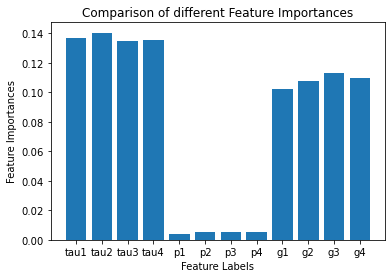

In [31]:
# bar plot showing the comparison of different feature importances
plt.bar(X.columns, feature_importance)
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')
plt.title('Comparison of different Feature Importances')
plt.show()

In [32]:
features

,Columns,feature
0,tau1,0.137240
1,tau2,0.140508
2,tau3,0.134680
3,tau4,0.135417
4,p1,0.003683
5,p2,0.005337
6,p3,0.005429
7,p4,0.004962
8,g1,0.102562
9,g2,0.107578
